In [147]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle
import gzip
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# disable the warnings
import logging
logger = logging.getLogger('matplotlib')
logger.setLevel(100)

In [2]:
class_names = [chr(i) for i in range(65, 91)]  # generate a list of uppercase English letters

In [6]:
model = load_model('final_model.h5')

with gzip.open('preprocessed_data.pkl.gz', 'rb') as f:
    loaded_data = pickle.load(f)
x = loaded_data['data']
y = loaded_data['labels']

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes=26)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.15,
                                                    stratify=y,
                                                    random_state=42)

In [9]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

8/8 [==============================] - 55s 7s/step


In [26]:
train_mistaken_letters_idx = [1, 2, 3, 7, 10, 11, 12, 15, 
                              18, 19, 20, 21, 25]
train_mistakes_B, train_mistakes_C, train_mistakes_D = [], [], []

In [17]:
y_train_idx = np.argmax(y_train, axis=1)
y_pred_train_idx = np.argmax(y_pred_train, axis=1)

# Confusion Matrix to Work On

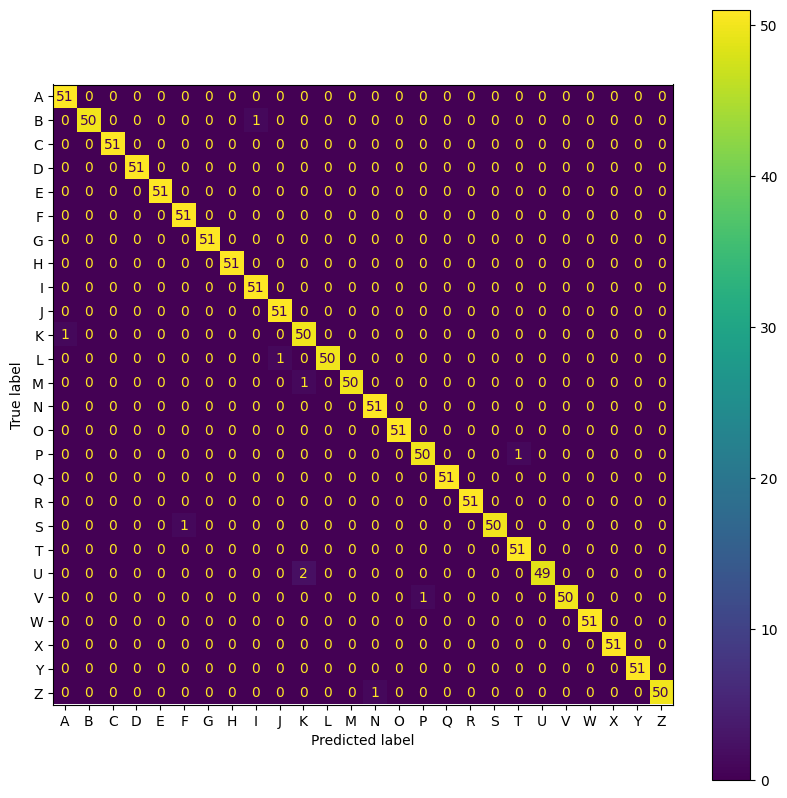

In [153]:
cm = confusion_matrix(y_train_idx, y_pred_train_idx)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax)
plt.show()

# Mistakes in Letter B

In [140]:
ROWS, COLS = 5, 10

In [141]:
train_B = []

In [142]:
for i in range(len(y_train_idx)):
    if y_train_idx[i] == 1:
        train_B.append(x_train[i])

In [143]:
B_preds = model.predict(np.array(train_B))

2/2 [==============================] - 10s 5s/step


In [144]:
B_preds = np.argmax(B_preds, axis=1)

In [145]:
B_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

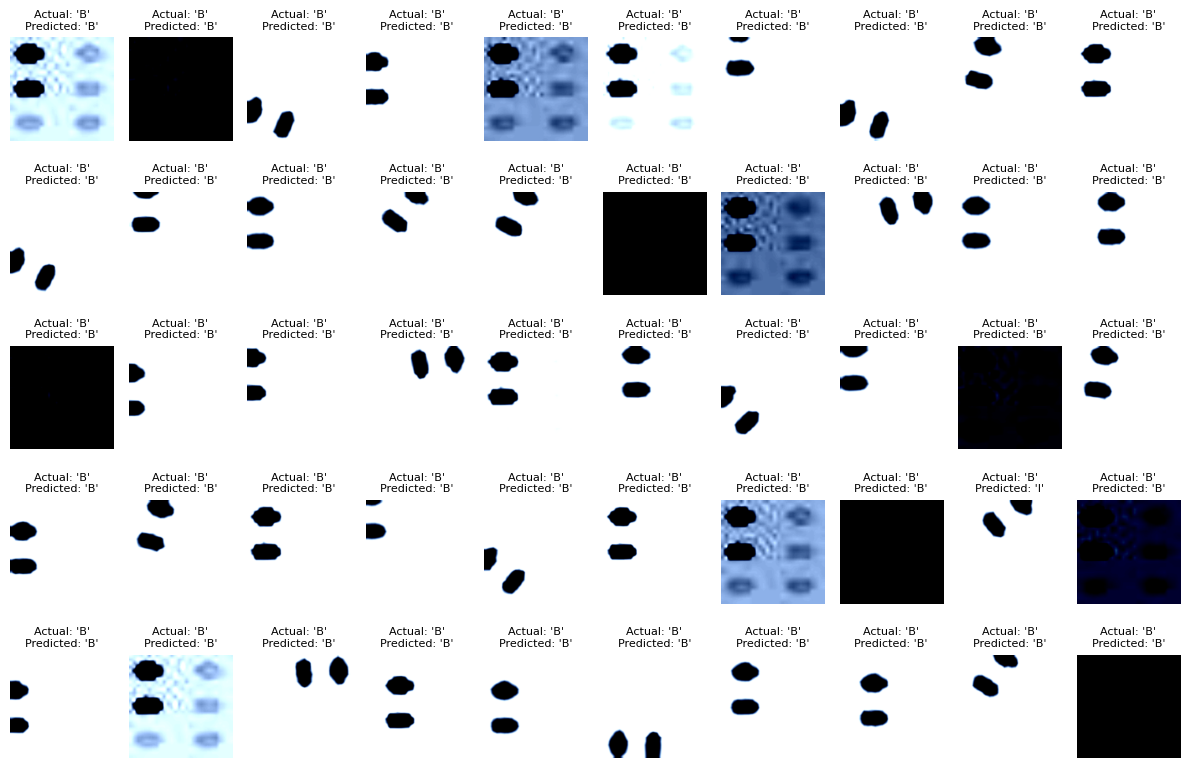

In [146]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(12, 8))
axes = axes.flatten()
for i in range(len(train_B) - 1):
    axes[i].imshow(train_B[i] * 255, cmap='gray')
    axes[i].axis('off')
    title = f"Actual: 'B'\nPredicted: '{class_names[B_preds[i]]}'"
    axes[i].set_title(title, fontsize=8)

for j in range(len(train_B), ROWS * COLS):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Mistakes in Letter K

In [160]:
train_K = []

In [167]:
for i in range(len(y_train_idx)):
    if y_train_idx[i] == 10:
        train_K.append(x_train[i])

In [162]:
K_preds = model.predict(np.array(train_K))

2/2 [==============================] - 12s 5s/step


In [163]:
K_preds = np.argmax(K_preds, axis=1)

In [164]:
K_preds

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=int64)

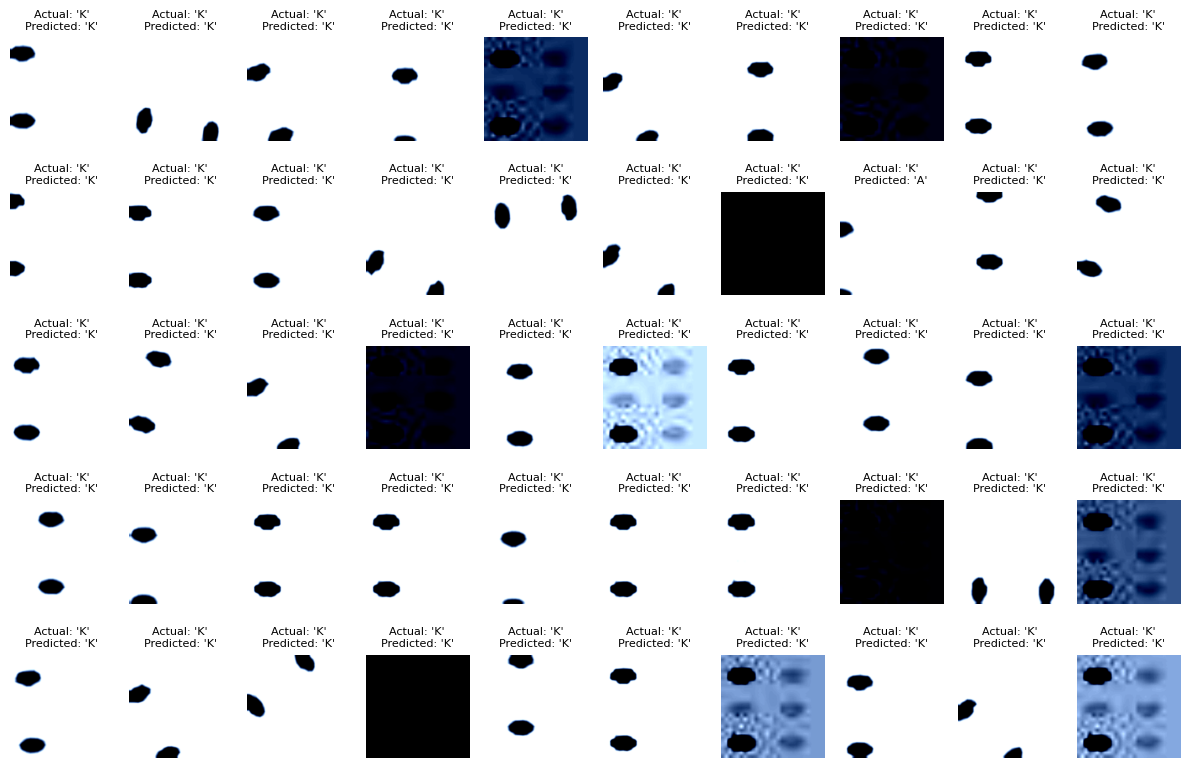

In [166]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(12, 8))
axes = axes.flatten()
for i in range(len(train_K) - 1):
    axes[i].imshow(train_K[i] * 255, cmap='gray')
    axes[i].axis('off')
    title = f"Actual: 'K'\nPredicted: '{class_names[K_preds[i]]}'"
    axes[i].set_title(title, fontsize=8)

for j in range(len(train_K), ROWS * COLS):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Mistakes in Letter L

In [168]:
train_L = []

In [169]:
for i in range(len(y_train_idx)):
    if y_train_idx[i] == 11:
        train_L.append(x_train[i])

In [170]:
L_preds = model.predict(np.array(train_L))

2/2 [==============================] - 13s 7s/step


In [171]:
L_preds = np.argmax(L_preds, axis=1)

In [172]:
L_preds

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  9, 11, 11, 11, 11],
      dtype=int64)

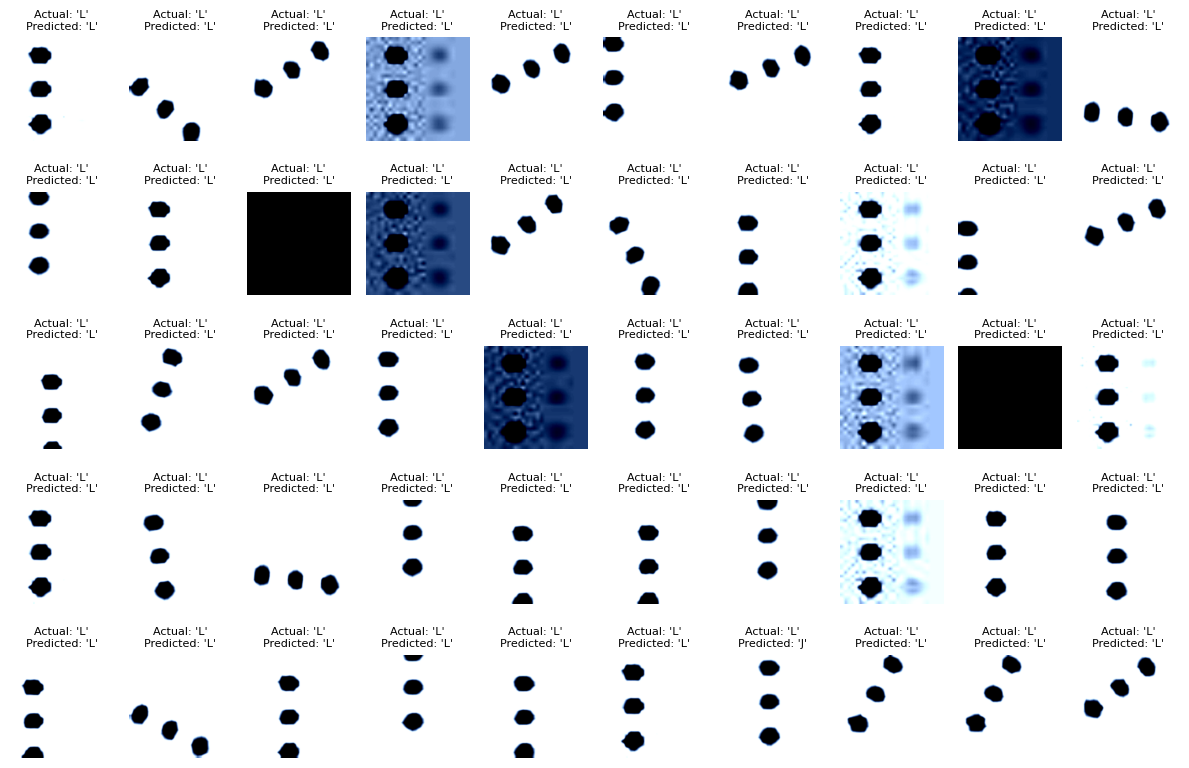

In [173]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(12, 8))
axes = axes.flatten()
for i in range(len(train_L) - 1):
    axes[i].imshow(train_L[i] * 255, cmap='gray')
    axes[i].axis('off')
    title = f"Actual: 'L'\nPredicted: '{class_names[L_preds[i]]}'"
    axes[i].set_title(title, fontsize=8)

for j in range(len(train_L), ROWS * COLS):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [50]:
mismatch_indices = []

for i in range(len(y_pred_train_idx)):
    if y_pred_train_idx[i] == 11 and y_train_idx[i] == 15:
        mismatch_indices.append(i)
    elif y_pred_train_idx[i] == 15 and y_train_idx[i] == 11:
        mismatch_indices.append(i)

In [51]:
mismatch_indices

[]

In [27]:
B_preds = model.predict(np.array(train_B))

2/2 [==============================] - 10s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


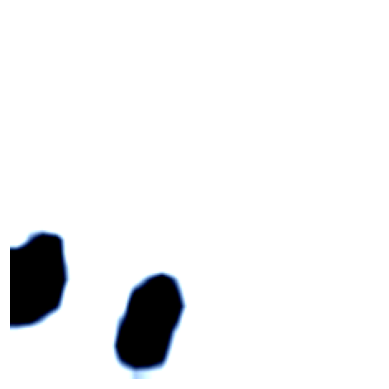

In [77]:
plt.imshow(train_B[7] * 255)
plt.axis('off')
plt.show()

In [31]:
np.argmax(B_preds, axis=1)

array([18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
      dtype=int64)

In [70]:
np.where(np.argmax(y_train, axis=1) != np.argmax(y_pred_train, axis=1))

(array([ 399, 1092, 1136, 1170, 1187, 1199, 1210, 1226, 1289, 1315]),)

In [82]:
np.argmax(y_pred_train, axis=1)

array([18, 18,  3, ..., 10,  5,  0])

In [84]:
np.argmax(y_train, axis=1)

array([18, 18,  3, ..., 10,  5,  0])

In [78]:
y_train[399], np.argmax(y_pred_train[399])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 0)

In [ ]:
for i in range(len(y_pred_train)):
    if 

In [ ]:
for i in range(len(y_train)):
    if np.where(y_train[i] == 1)[0][0] in train_mistaken_letters_idx:
        print(np.where(y_train[i] == 1)[0][0])
        train_mistakes.append(x_train[i])

In [41]:
model.evaluate(x_train, y_train)

42/42 [==============================] - 9s 140ms/step - loss: 0.1160 - accuracy: 0.9925


[0.11595217138528824, 0.9924585223197937]